In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') 
from pylab import rcParams
rcParams["figure.figsize"]=30,16

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
d1 = pd.read_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v12/v_12.xlsx", sheet_name = 'ln_orig')
d1.head()

,OpportunityID_ren,accountnumber,OpportunityID,lnlexidsele,inputcheckbusname,inputcheckbusaltname,inputcheckbusaddr,inputcheckbuscity,inputcheckbusstate,inputcheckbuszip,...,model1rc5,model1rc6,model2name,model2score,model2rc1,model2rc2,model2rc3,model2rc4,model2rc5,model2rc6
0,0062M00000gYsKAQA0,LCFLN202208126655,0062M00000gYsKAQA0,7.278946e+10,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,SLBO1702_0_2,691.0,B026,B052,B036,B037,NaN,NaN
1,0062M00000gYSqdQAG,LCFLN202208126660,0062M00000gYSqdQAG,0.000000e+00,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,SLBO1702_0_2,222.0,B068,NaN,NaN,NaN,NaN,NaN
2,0062M00000itNw6QAE,LCFLN202208127456,0062M00000itNw6QAE,7.087273e+08,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,SLBO1702_0_2,704.0,B069,B063,B052,B066,NaN,NaN
3,0062M00000ito3xQAA,LCFLN202208127457,0062M00000ito3xQAA,4.411074e+07,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,SLBO1702_0_2,692.0,B026,B069,B066,B076,NaN,NaN
4,0062M00000n0BgNQAU,LCFLN202208130968,0062M00000n0BgNQAU,1.345410e+11,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,SLBO1702_0_2,708.0,B069,B036,B052,B070,NaN,NaN


In [5]:
d1.shape

(3689, 392)

In [4]:
d2 = pd.read_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v12/v_12.xlsx", sheet_name = 'ren_orig')
d2.head()

,OpportunityID_ren,CreatedDate,FundedDate,OpportunityName,Priordeal_OppID,Renewal_PreviousCollectionStatus,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,...,Industry,Industry_Group__c,Avg_ReturnItemdays,LatestMonth_ReturnItemDays,PctChangeInReveune,PctAvgDailybalance2AvgMonthlyDeposits,TwoMonthAvg_AdjustedMonthlyDeposits,AdjustedMonthlyDeposits,drop_percent,Drop_category
0,0062M00000o8ivqQAA,2022-01-10 17:42:32,2022-01-11,Trinity African Bar & Grill-Renewal Deal-01102022,0062M00000nZ5ksQAC,Other,100.00,0.74,689.0,6.0,...,Services,90 - Restaurants & Bars,0.0,0.0,0.123046,0.174799,35799.237777,32815.22,-8.335428,Negative
1,0062M00000hmHKAQA2,2019-09-23 13:50:27,2019-09-30,Demaa Property Solutions-Renewal Deal-09232019,0062M00000gAssFQAS,Other,100.00,0.90,547.0,1.0,...,"Finance, Insurance, Real Estate",65 - Real Estate,0.0,0.0,0.054024,0.139416,19263.500000,31250.00,62.223894,Positive
2,0062M00000kxeWLQAY,2020-07-20 17:12:35,2020-07-27,Itz Eazy Hauling-Renewal Deal-07202020,0062M00000jKLV5QAO,Default,82.87,0.88,559.0,1.0,...,Transportation & Public Utilities,42 - Motor Freight Transportation and Warehousing,0.0,0.0,0.413426,0.072838,44199.206153,34087.00,-22.878714,Negative
3,0062M00000mTGVnQAO,2021-08-05 13:37:09,2021-08-10,Altitude Solutions Professional Services-New D...,0062M00000mhN0JQAU,Default,20.00,0.05,616.0,1.0,...,Services,"87 - Engineering, Accounting, Research, Manage...",0.0,NaN,-1.095377,2.337393,40417.822000,5474.06,-86.456316,Negative
4,0062M00000gb1LRQAY,2019-08-20 18:17:46,2019-08-21,Carr & Smith Dental-Renewal Deal-08202019,0062M00000g8ynEQAQ,Other,100.00,0.89,594.0,2.0,...,Services,80 - Health Services,2.0,2.0,0.103061,0.066637,98051.325000,131351.00,33.961478,Positive


In [6]:
d2.shape

(3968, 55)

In [7]:
data = pd.merge(d1, d2[['OpportunityID_ren','WriteOff_YN']], on = 'OpportunityID_ren')
data.head()

,OpportunityID_ren,accountnumber,OpportunityID,lnlexidsele,inputcheckbusname,inputcheckbusaltname,inputcheckbusaddr,inputcheckbuscity,inputcheckbusstate,inputcheckbuszip,...,model1rc6,model2name,model2score,model2rc1,model2rc2,model2rc3,model2rc4,model2rc5,model2rc6,WriteOff_YN
0,0062M00000gYsKAQA0,LCFLN202208126655,0062M00000gYsKAQA0,7.278946e+10,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,691.0,B026,B052,B036,B037,NaN,NaN,0.0
1,0062M00000gYSqdQAG,LCFLN202208126660,0062M00000gYSqdQAG,0.000000e+00,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,222.0,B068,NaN,NaN,NaN,NaN,NaN,0.0
2,0062M00000itNw6QAE,LCFLN202208127456,0062M00000itNw6QAE,7.087273e+08,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,704.0,B069,B063,B052,B066,NaN,NaN,0.0
3,0062M00000ito3xQAA,LCFLN202208127457,0062M00000ito3xQAA,4.411074e+07,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,692.0,B026,B069,B066,B076,NaN,NaN,0.0
4,0062M00000n0BgNQAU,LCFLN202208130968,0062M00000n0BgNQAU,1.345410e+11,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,708.0,B069,B036,B052,B070,NaN,NaN,0.0


In [8]:
data.shape

(3689, 393)

In [12]:
for i in data.columns:
  print(i)

OpportunityID_ren
accountnumber
OpportunityID
lnlexidsele
inputcheckbusname
inputcheckbusaltname
inputcheckbusaddr
inputcheckbuscity
inputcheckbusstate
inputcheckbuszip
inputcheckbusTIN
inputcheckbusphone
inputcheckbusfax
inputcheckbusnaics
inputcheckbussic
inputcheckbusage
inputcheckauthrepfirstname
inputcheckauthrepmiddlename
inputcheckauthreplastname
inputcheckauthrepaddr
inputcheckauthrepcity
inputcheckauthrepstate
inputcheckauthrepzip
inputcheckauthrepssn
inputcheckauthrepphone
inputcheckauthrepage
inputcheckauthrepdob
inputcheckauthrepdl
inputcheckauthrepdlstate
inputcheckauthrep2firstname
inputcheckauthrep2middlename
inputcheckauthrep2lastname
inputcheckauthrep2addr
inputcheckauthrep2city
inputcheckauthrep2state
inputcheckauthrep2zip
inputcheckauthrep2ssn
inputcheckauthrep2phone
inputcheckauthrep2age
inputcheckauthrep2dob
inputcheckauthrep2dl
inputcheckauthrep2dlstate
inputcheckauthrep3firstname
inputcheckauthrep3middlename
inputcheckauthrep3lastname
inputcheckauthrep3addr
input

In [15]:
LJ_data = ['liencount',
 'lientotalamount',
 'liennewesttype',
 'lientimeoldest',
 'lientimenewest',
 'liencount03m',
 'liencount12m',
 'liencount24m',
 'liencount36m',
 'lienfedtaxcount',
 'lienfedtaxtotalamount',
 'lienforeclosurecount',
 'lienforeclosuretotalamount',
 'lientenantcount',
 'lientenanttotalamount',
 'lienmechanicscount',
 'lienmechanicstotalamount',
 'lienothercount',
 'lienothertotalamount',
 'judgmentcount',
 'judgmenttotalamount',
 'judgmentnewesttype',
 'judgmenttimeoldest',
 'judgmenttimenewest',
 'judgmentcount03m',
 'judgmentcount12m',
 'judgmentcount24m',
 'judgmentcount36m',
 'judgmentcivilcourtcount',
 'judgmentcivilcourttotalamount',
 'judgmentsmallclaimscount',
 'judgmentsmallclaimstotalamount',
 'judgmentsuitscount',
 'judgmentssuitstotalamount',
 'judgmentsothercount',
 'judgmentothertotalamount',
 'lienjudgmentdollartotal', 
 'WriteOff_YN', 
 'OpportunityID_ren']
len(LJ_data)

39

In [16]:
lnj_data = data[LJ_data]
lnj_data.head()

,liencount,lientotalamount,liennewesttype,lientimeoldest,lientimenewest,liencount03m,liencount12m,liencount24m,liencount36m,lienfedtaxcount,...,judgmentcivilcourttotalamount,judgmentsmallclaimscount,judgmentsmallclaimstotalamount,judgmentsuitscount,judgmentssuitstotalamount,judgmentsothercount,judgmentothertotalamount,lienjudgmentdollartotal,WriteOff_YN,OpportunityID_ren
0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0062M00000gYsKAQA0
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0062M00000gYSqdQAG
2,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0062M00000itNw6QAE
3,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0062M00000ito3xQAA
4,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0062M00000n0BgNQAU


In [18]:
lnj_data.isna().sum()

liencount                         0
lientotalamount                   0
liennewesttype                    0
lientimeoldest                    0
lientimenewest                    0
liencount03m                      0
liencount12m                      0
liencount24m                      0
liencount36m                      0
lienfedtaxcount                   0
lienfedtaxtotalamount             0
lienforeclosurecount              0
lienforeclosuretotalamount        0
lientenantcount                   0
lientenanttotalamount             0
lienmechanicscount                0
lienmechanicstotalamount          0
lienothercount                    0
lienothertotalamount              0
judgmentcount                     0
judgmenttotalamount               0
judgmentnewesttype                0
judgmenttimeoldest                0
judgmenttimenewest                0
judgmentcount03m                  0
judgmentcount12m                  0
judgmentcount24m                  0
judgmentcount36m            

In [17]:
lnj_data.describe()

,liencount,lientotalamount,lientimeoldest,lientimenewest,liencount03m,liencount12m,liencount24m,liencount36m,lienfedtaxcount,lienfedtaxtotalamount,...,judgmentcivilcourtcount,judgmentcivilcourttotalamount,judgmentsmallclaimscount,judgmentsmallclaimstotalamount,judgmentsuitscount,judgmentssuitstotalamount,judgmentsothercount,judgmentothertotalamount,lienjudgmentdollartotal,WriteOff_YN
count,3689.000000,3.689000e+03,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,...,3689.000000,3.689000e+03,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3.689000e+03,3689.000000
mean,0.938737,2.712655e+04,6.400380,2.791000,-0.071835,0.102738,0.301437,0.492816,0.119545,12300.141231,...,0.066685,1.428152e+04,-0.108159,128.082136,-0.132827,12.895094,-0.145568,-0.145568,4.154885e+04,0.265926
std,4.786725,2.958598e+05,18.539543,10.450974,0.780727,1.344030,2.062263,2.928192,1.563400,86762.988120,...,0.940415,1.915078e+05,0.540608,1369.297632,0.392761,386.262377,0.352720,0.352720,3.694878e+05,0.441885
min,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000e+00,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000e+00,0.000000
50%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000e+00,0.000000
75%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000e+00,1.000000
max,77.000000,8.216095e+06,84.000000,82.000000,29.000000,29.000000,34.000000,55.000000,19.000000,999999.000000,...,12.000000,5.934682e+06,8.000000,26573.000000,4.000000,18910.000000,0.000000,0.000000,8.759472e+06,1.000000


In [19]:
LJ_numerical_attributes = lnj_data.columns[lnj_data.dtypes!="object"]
LJ_categorical_attributes = lnj_data.columns[lnj_data.dtypes=="object"]
print("LJ_numerical_attributes :", len(LJ_numerical_attributes), "\n")
print(LJ_numerical_attributes)
print('\n')
print("LJ_categorical_attributes :", len(LJ_categorical_attributes), "\n")
print(LJ_categorical_attributes)

LJ_numerical_attributes : 36 

Index(['liencount', 'lientotalamount', 'lientimeoldest', 'lientimenewest',
       'liencount03m', 'liencount12m', 'liencount24m', 'liencount36m',
       'lienfedtaxcount', 'lienfedtaxtotalamount', 'lienforeclosurecount',
       'lienforeclosuretotalamount', 'lientenantcount',
       'lientenanttotalamount', 'lienmechanicscount',
       'lienmechanicstotalamount', 'lienothercount', 'lienothertotalamount',
       'judgmentcount', 'judgmenttotalamount', 'judgmenttimeoldest',
       'judgmenttimenewest', 'judgmentcount03m', 'judgmentcount12m',
       'judgmentcount24m', 'judgmentcount36m', 'judgmentcivilcourtcount',
       'judgmentcivilcourttotalamount', 'judgmentsmallclaimscount',
       'judgmentsmallclaimstotalamount', 'judgmentsuitscount',
       'judgmentssuitstotalamount', 'judgmentsothercount',
       'judgmentothertotalamount', 'lienjudgmentdollartotal', 'WriteOff_YN'],
      dtype='object')


LJ_categorical_attributes : 3 

Index(['liennewesttype', 

In [20]:
lnj_data =  lnj_data.drop(['liennewesttype', 'judgmentnewesttype'], axis=1)
lnj_data.head(3)

,liencount,lientotalamount,lientimeoldest,lientimenewest,liencount03m,liencount12m,liencount24m,liencount36m,lienfedtaxcount,lienfedtaxtotalamount,...,judgmentcivilcourttotalamount,judgmentsmallclaimscount,judgmentsmallclaimstotalamount,judgmentsuitscount,judgmentssuitstotalamount,judgmentsothercount,judgmentothertotalamount,lienjudgmentdollartotal,WriteOff_YN,OpportunityID_ren
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0062M00000gYsKAQA0
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0062M00000gYSqdQAG
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0062M00000itNw6QAE


## Checking Missing Values

In [ ]:
def missing_val(df_feature):
  print('Missing values in attribute :', '\n' )
  print(df_feature.isna().sum(), '\n')
  print('**************************************************************************************')
  print('Missing values in attribute_% :', '\n' )
  print(df_feature.isna().sum()/len(df_feature)*100, '\n')

In [ ]:
missing_val(lnj_data)

Missing values in attribute : 

liencount                         0
lientotalamount                   0
lientimeoldest                    0
lientimenewest                    0
liencount03m                      0
liencount12m                      0
liencount24m                      0
liencount36m                      0
lienfedtaxcount                   0
lienfedtaxtotalamount             0
lienforeclosurecount              0
lienforeclosuretotalamount        0
lientenantcount                   0
lientenanttotalamount             0
lienmechanicscount                0
lienmechanicstotalamount          0
lienothercount                    0
lienothertotalamount              0
judgmentcount                     0
judgmenttotalamount               0
judgmenttimeoldest                0
judgmenttimenewest                0
judgmentcount03m                  0
judgmentcount12m                  0
judgmentcount24m                  0
judgmentcount36m                  0
judgmentcivilcourtcount         

## Checking Unique Values

In [21]:
def unique_value_counts(df_feature):
  print('Value counts of attribute :', '\n' )
  print(df_feature.value_counts())
  print('\n')
  print('**************************************************************************************')
  print('Unique number of attribute :', '\n' )
  print(df_feature.unique())
  print('\n')

In [ ]:
for col in lnj_data:
  print('\033[1m'+'attribute_name :', col+'\033[0m')
  unique_value_counts(lnj_data[col])

attribute_name : liencount
Value counts of attribute : 

 0.0     2354
-1.0      508
 1.0      164
 2.0       90
 4.0       37
 3.0       37
 6.0       25
 5.0       20
 9.0       15
 10.0      14
 8.0       13
 21.0      12
 7.0        8
 14.0       7
 18.0       7
 32.0       6
 15.0       5
 22.0       4
 25.0       4
 20.0       4
 19.0       4
 17.0       4
 38.0       4
 11.0       4
 40.0       4
 13.0       4
 39.0       3
 29.0       3
 30.0       2
 77.0       2
 16.0       2
 26.0       2
 43.0       1
 24.0       1
 48.0       1
 37.0       1
 36.0       1
 31.0       1
 34.0       1
 28.0       1
 12.0       1
 57.0       1
Name: liencount, dtype: int64


**************************************************************************************
Unique number of attribute : 

[32.  0. 15.  4.  1. -1. 40.  3.  2. 11. 38. 21. 26.  5. 20.  8. 22. 25.
  6. 36. 19.  9. 16. 18. 14. 10. 13. 29. 77. 30. 43. 17. 24. 48.  7. 37.
 39. 31. 34. 28. 12. 57.]


attribute_name : lientotalamoun

## Checking correaltion w. r. to WriteOff_YN 

In [22]:
def corr(df_features):
  for i in lnj_data.corr()['WriteOff_YN'].sort_values().index:
    a = f'{i:50}{round(lnj_data.corr()["WriteOff_YN"][i], 3)}'
    print(a)
  print('\n')
  
  plt.figure(figsize = (18,8))
  plt.title('Correlation w. r. to WriteOff_YN')
  sns.countplot(round(lnj_data.corr()["WriteOff_YN"].sort_values(), 3))
  plt.xlabel('Corr w. r. to WriteOff_YN')
  plt.ylabel('No. of attributes(Count)')

lientimeoldest                                    -0.094
lientimenewest                                    -0.076
judgmenttimeoldest                                -0.062
judgmenttimenewest                                -0.055
liencount36m                                      -0.053
liencount                                         -0.051
lienfedtaxcount                                   -0.051
liencount24m                                      -0.049
lienfedtaxtotalamount                             -0.046
judgmentcivilcourtcount                           -0.046
judgmentcount                                     -0.045
liencount12m                                      -0.041
judgmentsmallclaimscount                          -0.037
judgmentsmallclaimstotalamount                    -0.034
lientotalamount                                   -0.03
judgmentcount36m                                  -0.027
liencount03m                                      -0.026
lienjudgmentdollartotal         

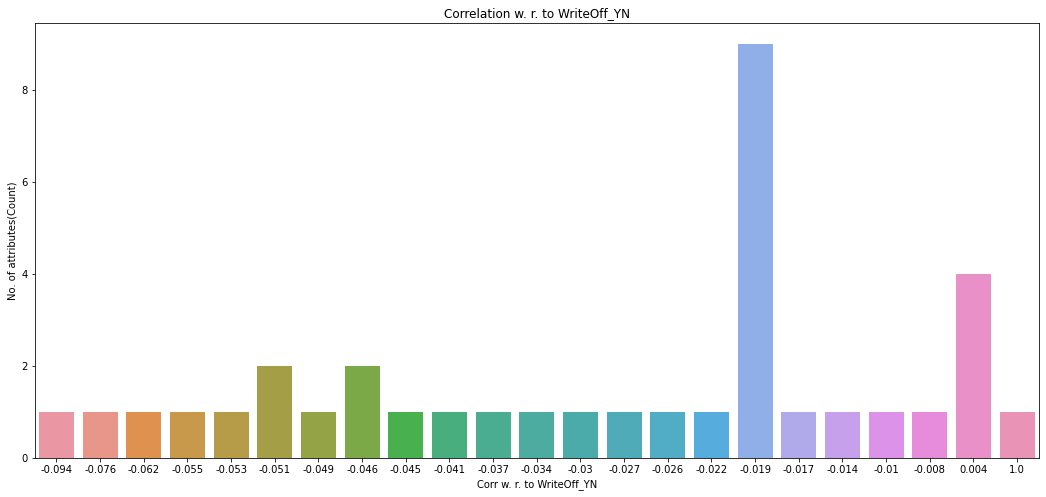

In [23]:
corr(lnj_data)

In [24]:
lnj_data.shape # earlier shape was 39, categorical features dropped = 2

(3689, 37)

In [25]:
# due to constant values - they are dropped. No correlation we are getting
lnj_data.drop(columns = ['lienforeclosurecount', 
                         'lienforeclosuretotalamount', 
                         'lientenantcount',
                         'lientenanttotalamount', 
                         'lienmechanicscount', 
                         'lienmechanicstotalamount',
                         'lienothertotalamount', 
                         'judgmentsothercount', 
                         'judgmentothertotalamount'], axis = 1, inplace = True)
lnj_data.shape

(3689, 28)

In [26]:
def lien_judgement_FE(df):
  for i in df.columns:
    if i == 'OpportunityID_ren' or i == 'WriteOff_YN':
      continue
    df[i+'_value'] = df[i].apply(lambda x:0 if x < 0 else x)
    df[i+'_flag'] = df[i].apply(lambda x: 1 if x < 0 else 0)
    df.drop(i,axis = 'columns',inplace = True)

In [27]:
lien_judgement_FE(lnj_data)

In [28]:
lnj_data

,WriteOff_YN,OpportunityID_ren,liencount_value,liencount_flag,lientotalamount_value,lientotalamount_flag,lientimeoldest_value,lientimeoldest_flag,lientimenewest_value,lientimenewest_flag,...,judgmentsmallclaimscount_value,judgmentsmallclaimscount_flag,judgmentsmallclaimstotalamount_value,judgmentsmallclaimstotalamount_flag,judgmentsuitscount_value,judgmentsuitscount_flag,judgmentssuitstotalamount_value,judgmentssuitstotalamount_flag,lienjudgmentdollartotal_value,lienjudgmentdollartotal_flag
0,0.0,0062M00000gYsKAQA0,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1
1,0.0,0062M00000gYSqdQAG,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
2,0.0,0062M00000itNw6QAE,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1
3,0.0,0062M00000ito3xQAA,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1
4,0.0,0062M00000n0BgNQAU,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,0.0,0062M00000gYcpIQAS,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1
3685,0.0,0062M00000gYdrBQAS,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1
3686,1.0,0062M00000gYfg0QAC,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,0,0.0,0,0.0,0,0.0,0,46135.0,0
3687,1.0,0062M00000gYic7QAC,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1


In [30]:
round(lnj_data.corr()["WriteOff_YN"], 3)

WriteOff_YN                             1.000
liencount_value                        -0.050
liencount_flag                          0.019
lientotalamount_value                  -0.030
lientotalamount_flag                    0.019
lientimeoldest_value                   -0.094
lientimeoldest_flag                     0.019
lientimenewest_value                   -0.075
lientimenewest_flag                     0.019
liencount03m_value                     -0.020
liencount03m_flag                       0.019
liencount12m_value                     -0.038
liencount12m_flag                       0.019
liencount24m_value                     -0.047
liencount24m_flag                       0.019
liencount36m_value                     -0.052
liencount36m_flag                       0.019
lienfedtaxcount_value                  -0.049
lienfedtaxcount_flag                    0.019
lienfedtaxtotalamount_value            -0.046
lienfedtaxtotalamount_flag              0.019
lienothercount_value              

In [31]:
lnj_data.columns

Index(['WriteOff_YN', 'OpportunityID_ren', 'liencount_value', 'liencount_flag',
       'lientotalamount_value', 'lientotalamount_flag', 'lientimeoldest_value',
       'lientimeoldest_flag', 'lientimenewest_value', 'lientimenewest_flag',
       'liencount03m_value', 'liencount03m_flag', 'liencount12m_value',
       'liencount12m_flag', 'liencount24m_value', 'liencount24m_flag',
       'liencount36m_value', 'liencount36m_flag', 'lienfedtaxcount_value',
       'lienfedtaxcount_flag', 'lienfedtaxtotalamount_value',
       'lienfedtaxtotalamount_flag', 'lienothercount_value',
       'lienothercount_flag', 'judgmentcount_value', 'judgmentcount_flag',
       'judgmenttotalamount_value', 'judgmenttotalamount_flag',
       'judgmenttimeoldest_value', 'judgmenttimeoldest_flag',
       'judgmenttimenewest_value', 'judgmenttimenewest_flag',
       'judgmentcount03m_value', 'judgmentcount03m_flag',
       'judgmentcount12m_value', 'judgmentcount12m_flag',
       'judgmentcount24m_value', 'judgmentc

In [33]:
lnj_data.to_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v12/FE_V12_CSVs/lien_judge.xlsx",index=False)

In [ ]:
# lienforeclosurecount_value               NaN
# lienforeclosuretotalamount_value         NaN
# lientenantcount_value                    NaN
# lientenanttotalamount_value              NaN
# lienmechanicscount_value                 NaN
# lienmechanicstotalamount_value           NaN
# lienothertotalamount_value               NaN
# judgmentsothercount_value                NaN
# judgmentothertotalamount_value           NaN

In [ ]:
# attribute_name : lienforeclosurecount
# Value counts of attribute : 
#  0.0    2874
# -1.0     508

# attribute_name : lienforeclosuretotalamount
# Value counts of attribute : 

#  0.0    2874
# -1.0     508

# attribute_name : lientenantcount
# Value counts of attribute : 

#  0.0    2874
# -1.0     508

# attribute_name : lientenanttotalamount
# Value counts of attribute : 

#  0.0    2874
# -1.0     508

# attribute_name : lienmechanicscount
# Value counts of attribute : 

#  0.0    2874
# -1.0     508

# attribute_name : lienmechanicstotalamount
# Value counts of attribute : 

#  0.0    2874
# -1.0     508

# attribute_name : lienothertotalamount
# Value counts of attribute : 

#  0.0    2874
# -1.0     508

# attribute_name : judgmentsothercount
# Value counts of attribute : 

#  0.0    2874
# -1.0     508

# attribute_name : judgmentothertotalamount
# Value counts of attribute : 

#  0.0    2874
# -1.0     508